In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
rain_df = pd.read_csv('Day_18/rainfall.csv')
rain_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1,1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38
2,1873,2.96,7.14,4.11,3.59,6.31,4.20,4.63,2.36,1.81,4.28,4.36,5.94
3,1874,5.22,9.23,5.36,11.84,1.49,2.87,2.65,3.52,3.12,2.63,6.12,4.19
4,1875,6.15,3.06,8.14,4.22,1.73,5.63,8.12,1.60,3.79,1.25,5.46,4.30


In [15]:
def plot_hist_basic(df,col):
    data = df[col]
    ax=data.hist(bins=20,edgecolor='none',figsize=(10,7), alpha = .5)
    ax.set_ylabel('Probability Density')
    ax.set_title(col)
    return ax

<AxesSubplot:title={'center':'Jan'}, ylabel='Probability Density'>

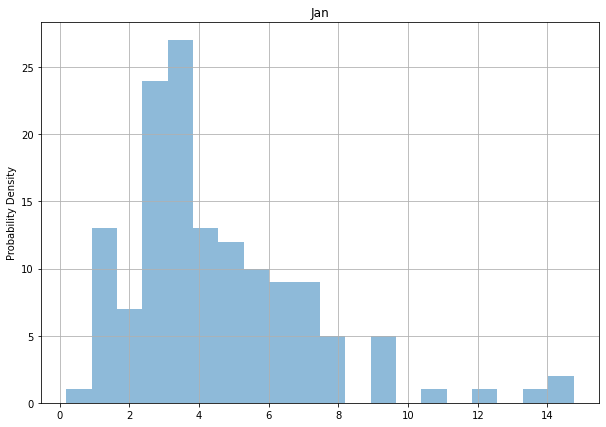

In [16]:
plot_hist_basic(rain_df,'Jan')

In [17]:
def get_sample_mean_var(df,col):
    data=df[col]
    return data.mean(),data.var(ddof=1)

In [18]:
get_sample_mean_var(rain_df,'Jan')

(4.54457142857143, 6.916774635149025)

In [25]:
  import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

class method_of_moment(object):
    def __init__(self):
        pass
    def fit(self,df,col):
        self.df=df
        self.col = col
        self.samp_mean,self.samp_var =get_sample_mean_var(self.df,self.col)
        self._fit_gamma()
        self.fit_normal()
    def _fit_gama(self):
        self.alpha = self.samp_mean**2 / self.samp_var
        self.beta = self.samp_mean/self.samp_var
    def _fit_normal(self):
        self.samp_std= self.samp_var**.5
    def plot_pdf(self,ax=None,gamma = True, normal = True, xlim=None,ylim=None):
        if ax is None:
            ax=plot_hist_basic(self.df,self.col)
        x_vals = np.linspace(self.df[self.col].min(), self.df[self.col].max())
        if gamma:
            gamma_rv = stats.gamma(a=self.alpha,scale=1/self.beta)
            gamma_p=ramma_rv.pdf(x_vals)
            ax.plot(x_vals,gamma_p,color='b',label='Gamma MOM',alpha=0.6)
        if normal:
            normal_rv = stats.norm(loc=self.samp_mean, scale=self.samp_std)
            normal_p = normal_rv.pdf(x_vals)
            ax.plot(x_vals, normal_p, color = 'k', label= 'Normal MOM',alpha=0.6)

        ax.set_ylabel("Probability Density")
        ax.legend()

        if not xlim is None:
            ax.set_xlim(*xlim)

        if not ylim is None:
            ax.set_ylim(*ylim)
        
        return ax

In [26]:
MoM = method_of_moment()
MoM.fit(rain_df,'Jan')
MoM.plot_pdf()

AttributeError: 'method_of_moment' object has no attribute '_fit_gamma'